In [1]:
import matplotlib as plt
import tensorflow as tf
from tensorflow import keras
from file_io import features_from_file, labels_from_file, add_history
from utils import labels_to_categorical, transpose_vector, get_count, get_mean_stddev, normalize_data,norm_multiple
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns


In [2]:
%cd "C:/Users/admin/Documents/AgeDetection/voice-bases-age-age-classification/"

[WinError 2] The system cannot find the file specified: 'C:/Users/admin/Documents/AgeDetection/voice-bases-age-age-classification/'
c:\Users\admin\Documents\AgeDetection\voice-bases-age-gender-classification


C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [3]:
age_model = tf.keras.models.load_model("model/lstm_age_41/lstm_age_41_60.keras")
gender_model = tf.keras.models.load_model("model/lstm_gender_41/lstm_gender_41_30.keras")

In [4]:
age_means = "model\lstm_age_41\means_age_41.npy"
age_std_dev = "model\lstm_age_41\stddev_age_41.npy"

In [5]:
input_test_file_gender = "age_data_clean_2/age_in"
output_test_file_gender = "age_data_clean_2/age_out"
input_test = features_from_file(input_test_file_gender, 41)
input_test = transpose_vector(input_test)
output_test = labels_from_file(output_test_file_gender)
output_test = labels_to_categorical(output_test)

X_age_test = input_test
Y_age_test = output_test

In [6]:
means, std_dev = get_mean_stddev(X_age_test)
X_age_test = normalize_data(X_age_test, means, std_dev)

In [7]:
y_pred = age_model.predict(X_age_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


In [8]:
y_pred = np.around(y_pred, decimals=0)
y_pred

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [9]:
current_matrix = np.array([[1],[2],[3],[4],[5]])
Y_age_test_class = Y_age_test @ current_matrix
Y_age_test_class = Y_age_test_class[:,0].T
Y_age_test_class

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

In [10]:
y_pred_class = y_pred @ current_matrix
y_pred_class = y_pred_class[:,0].T
y_pred_class

array([5., 5., 0., 5., 2., 0., 5., 5., 0., 3., 0., 0., 5., 0., 1., 0., 3.,
       3., 0., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 0., 0., 0., 4., 0., 5., 5., 5., 0., 5., 0., 0., 5., 5., 5., 0.,
       2., 5., 2., 1., 1., 1., 1., 1., 1., 1., 0., 1., 4., 4., 2., 4., 5.,
       2., 4., 3., 2., 2., 2., 3., 5., 5., 3., 3., 0., 0., 3., 3., 3., 3.,
       3., 3., 0., 3., 0., 5., 0., 0., 0., 0., 0., 2., 3., 3., 5., 5., 5.,
       5., 3., 3., 0., 3., 3., 3., 3., 5., 0., 2., 2., 5., 5., 0., 0., 0.,
       5., 3., 5., 0., 3., 5., 0., 5., 0., 0., 0., 0., 3., 5., 0., 3., 0.,
       5., 2., 0., 5., 0., 0., 0., 3., 3., 0., 3., 5., 3., 1., 3., 3., 3.,
       3., 3., 3., 3., 3., 0., 2., 2., 0., 1., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 1., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 0., 4., 4., 4., 4., 0., 4., 4., 4.,
       4., 0., 4., 0., 4.

In [12]:
conf_matrix = confusion_matrix(Y_age_test_class, y_pred_class)
row_sums = conf_matrix.sum(axis=1)
norm_conf_matrix = conf_matrix / row_sums[:, np.newaxis]
acc_score = accuracy_score(Y_age_test_class, y_pred_class)
print("Score of prediction:", acc_score)

Score of prediction: 0.728


C:\Users\admin\AppData\Local\Temp\ipykernel_142744\685249243.py:3: RuntimeWarning: invalid value encountered in divide
  norm_conf_matrix = conf_matrix / row_sums[:, np.newaxis]


In [16]:
labels = ["unknown", "fifties_sixties","fourties", "teens",
    "thirties", "twenties"]


<Axes: >

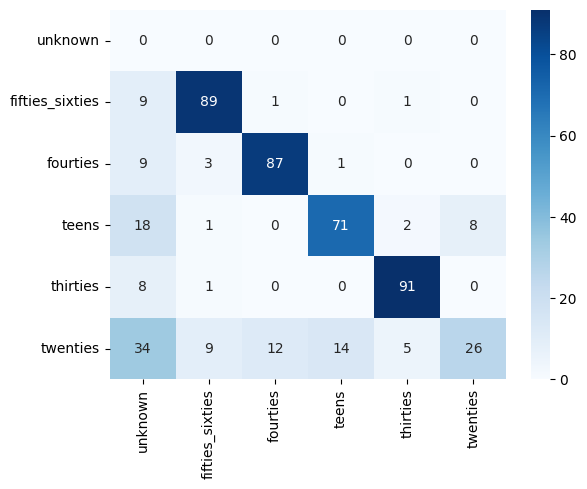

In [17]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
